In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [ ]:
!wget --no-check-certificate \
 https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz 

--2022-09-01 03:41:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240707 (11M) [application/x-httpd-php]
Saving to: ‘covtype.data.gz.1’

covtype.data.gz.1   100%[===================>]  10.72M  6.86MB/s    in 1.6s    

2022-09-01 03:41:28 (6.86 MB/s) - ‘covtype.data.gz.1’ saved [11240707/11240707]



In [ ]:
!gzip -d "/content/covtype.data.gz"

In [ ]:
df= pd.read_csv("covtype.data", header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


**Week6 - Ex2**

In [ ]:
df_test=pd.read_csv("/content/sample_data/Google_Stock_Price_Test.csv")
df_train=pd.read_csv("/content/sample_data/Google_Stock_Price_Train.csv")

In [ ]:
df_train.shape

(1258, 6)

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


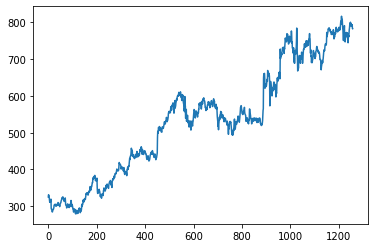

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_train["Open"])

In [ ]:
train = df_train.loc[:,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
# Creating X and y training data
X_train =[]
y_train=[]

for i in range(50,1258):
  X_train.append(train_scaled[i-50:i,0])
  y_train.append(train_scaled[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(1208, 50)
(1208,)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1208, 50, 1)

In [ ]:
# Simple RNN 4 Layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM

regressor = Sequential()
# First Layer
regressor.add(SimpleRNN (units =50, activation ="tanh", return_sequences= True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Second Layer
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
# Third Layer
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
#Fourth Layer
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
#output layer
regressor.add(Dense(units = 1))


regressor.compile(optimizer = "adam", loss = "mean_squared_error")
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
38/38 [==============================] - 11s 155ms/step - loss: 0.4668
Epoch 2/50
38/38 [==============================] - 6s 156ms/step - loss: 0.2796
Epoch 3/50
38/38 [==============================] - 6s 156ms/step - loss: 0.1984
Epoch 4/50
38/38 [==============================] - 6s 156ms/step - loss: 0.1685
Epoch 5/50
38/38 [==============================] - 6s 160ms/step - loss: 0.1515
Epoch 6/50
38/38 [==============================] - 6s 157ms/step - loss: 0.1239
Epoch 7/50
38/38 [==============================] - 6s 152ms/step - loss: 0.0940
Epoch 8/50
38/38 [==============================] - 6s 169ms/step - loss: 0.0800
Epoch 9/50
38/38 [==============================] - 6s 154ms/step - loss: 0.0707
Epoch 10/50
38/38 [==============================] - 6s 153ms/step - loss: 0.0609
Epoch 11/50
38/38 [==============================] - 6s 154ms/step - loss: 0.0516
Epoch 12/50
38/38 [==============================] - 6s 158ms/step - loss: 0.0418
Epoch 13/50
38/38 [=====

In [ ]:
# LSTM

model = Sequential()
# First layer
model.add(LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# Second Layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#Third Layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#Fourth Layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs =50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 8s 14ms/step - loss: 0.0414
Epoch 2/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0067
Epoch 3/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0056
Epoch 4/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 5/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0051
Epoch 6/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 7/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 8/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 9/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 10/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 11/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0038
Epoch 12/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 13/50
38/38 [==================

In [ ]:
# Making predictions on test data

test = df_test.loc[:,["Open"]].values

dataset_total = pd.concat((df_train["Open"], df_test["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(df_test)-50:].values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
X_test=[]
for i in range(50,70):
    X_test.append(inputs[i-50:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
# Prediction from SimpleRNN
predicted_stock_price_RNN=regressor.predict(X_test)
predicted_stock_price_RNN=scaler.inverse_transform(predicted_stock_price_RNN)

# Prediction from LSTM
predicted_stock_price_LSTM=model.predict(X_test)
predicted_stock_price_LSTM=scaler.inverse_transform(predicted_stock_price_LSTM)

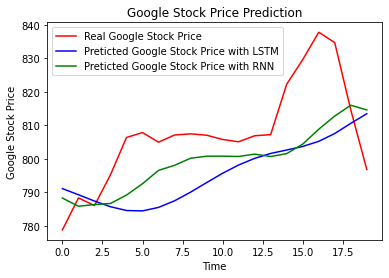

In [ ]:
plt.plot(test,color="red",label="Real Google Stock Price")
plt.plot(predicted_stock_price_LSTM,color="blue",label="Preticted Google Stock Price with LSTM")
plt.plot(predicted_stock_price_RNN,color="green",label="Preticted Google Stock Price with RNN")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()